This notebook generates the following panels:
- ( ) Summary - Scatter: Open loop vs close loop preferred depth
- ( ) Summary - Scatter: Open loop vs close loop preferred RS
- ( ) Summary - Scatter: Open loop vs close loop preferred of
- ( ) Summary - Scatter: Open loop preferred RS - close loop preferred deph
- ( ) Summary - Scatter: Open loop preferred OF - close loop preferred deph

use env 2p_analysis_cottage

In [2]:
VERSION = 1

In [3]:
import os
import sys
import defopt
import pickle
import numpy as np
import pandas as pd
import scipy.stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 # save text as text not outlines
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
import seaborn as sns

from cottage_analysis.depth_analysis.filepath import generate_filepaths
from cottage_analysis.depth_analysis.depth_preprocess.process_params import create_speed_arr, create_trace_arr_per_roi, calculate_OF, thr
from cottage_analysis.depth_analysis.plotting.plotting_utils import *

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from scipy.stats import spearmanr


In [4]:
# Load data
root = '/camp/lab/znamenskiyp/home/shared/presentations/PetrTalk202302/open_closeloop_RS_OF/'
save_root = '/camp/lab/znamenskiyp/home/shared/presentations/Cosyne2023/ver'+str(VERSION)+'/open_loop_summary/'
if not os.path.exists(save_root):
    os.makedirs(save_root)
    
with open(root+'data/gaussian_fit_summary_closeloop.pickle','rb') as handle:
    close_df = pickle.load(handle)
    
with open(root+'data/gaussian_fit_summary_openloop.pickle','rb') as handle:
    open_df = pickle.load(handle)
    
    
# Filter neurons based on the goodness of fit (R2) of openloop
r2_thr = 0.01
select_idx = (close_df["r_sq"] > r2_thr) & (open_df["r_sq"] > r2_thr)
close_df = close_df[select_idx]
open_df = open_df[select_idx]

/camp/home/hey2/.conda/envs/2p_analysis_cottage/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/camp/home/hey2/.conda/envs/2p_analysis_cottage/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[0.62085715]] [1.54632461]
Spearman R between close & open loop preferred depth: SpearmanrResult(correlation=0.6486064620737472, pvalue=1.1969063620351863e-250)
[[0.55045571]] [1.32458082]
Spearman R between close & open loop preferred RS: SpearmanrResult(correlation=0.5458213839003339, pvalue=3.918204364247021e-163)
[[0.3935706]] [1.99836497]
Spearman R between close & open loop preferred OF: SpearmanrResult(correlation=0.5103412205934377, pvalue=1.894436522265628e-139)
[[0.07486263]] [3.99122105]
Spearman R between RS & preferred depth: SpearmanrResult(correlation=0.10520235596757237, pvalue=1.3786752202350982e-06)
[[-0.22226775]] [4.91166647]
Spearman R between OF & preferred depth: SpearmanrResult(correlation=-0.5176477081600566, pvalue=4.240746194628279e-144)


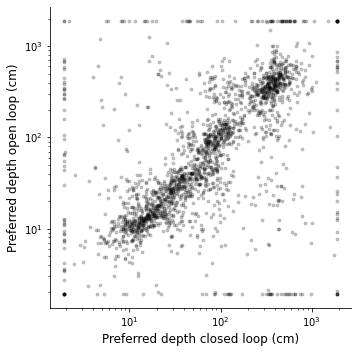

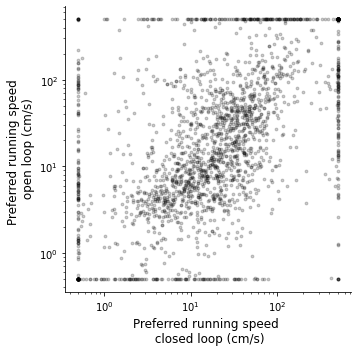

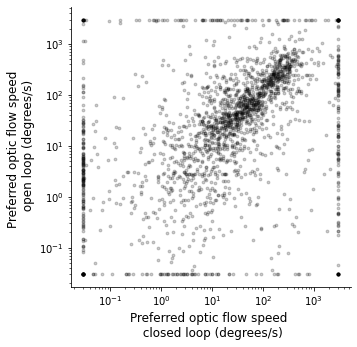

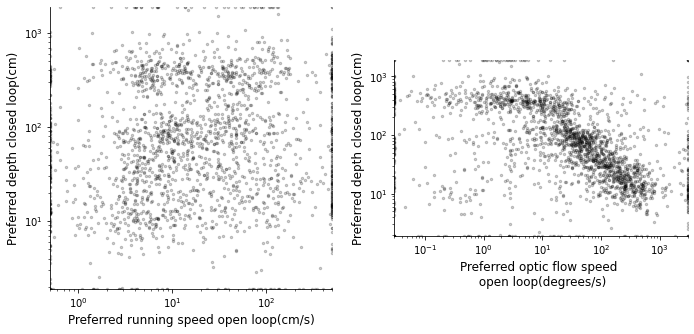

In [8]:
# Plot Close loop vs Open loop, preferred depth, preferred RS, preferred OF
fontsize_dict = {
    'title': 10,
    'xlabel': 12,
    'ylabel': 12,
    'xticks': 10,
    'yticks': 10,
    'legend': 5
}
    
# --- FIG 1: Preferred depth, close vs open --- 
depth_close = np.array(close_df['preferred_depth_gaussian'])
depth_open = np.array(open_df['preferred_depth_gaussian'])
plt.figure(figsize=(5,5))
scatter_plot_fit_line(X=depth_close.reshape(-1,1), y=depth_open.reshape(-1,1), 
                      x2=depth_close.reshape(-1,1), 
                      xlabel='Preferred depth closed loop (cm)', 
                          ylabel='Preferred depth open loop (cm)', n_boots=50000, s=8, alpha=0.2,c='k',
                      log=True,
                     fit_line=False, 
                     model=LinearRegression())
print('Spearman R between close & open loop preferred depth:', spearmanr(depth_close, depth_open))
plt.xlabel('Preferred depth closed loop (cm)', fontsize=fontsize_dict['xlabel'])
plt.ylabel('Preferred depth open loop (cm)', fontsize=fontsize_dict['ylabel'])
plt.xticks(fontsize=fontsize_dict['xticks'])
plt.yticks(fontsize=fontsize_dict['yticks'])
plt.gca().set_aspect('equal','box')
plt.tight_layout(pad=1)
plt.savefig(save_root + 'preferred_depth_close_vs_open.pdf')

# --- FIG 2: Preferred RS, close vs open --- 
rs_close= np.exp(np.array(close_df['xo_logged'].astype('float64')))
rs_open = np.exp(np.array(open_df['xo_logged'].astype('float64')))
plt.figure(figsize=(5,5))
scatter_plot_fit_line(X=rs_close.reshape(-1,1), y=rs_open.reshape(-1,1), 
                      x2=rs_close.reshape(-1,1), 
                      xlabel='', 
                          ylabel='', n_boots=50000, s=8, alpha=0.2,c='k',
                      log=True,
                     fit_line=False, 
                     model=LinearRegression())
print('Spearman R between close & open loop preferred RS:', spearmanr(rs_close, rs_open))
plt.xlabel('Preferred running speed \n closed loop (cm/s)', fontsize=fontsize_dict['xlabel'])
plt.ylabel('Preferred running speed \n open loop (cm/s)', fontsize=fontsize_dict['ylabel'])
plt.xticks(fontsize=fontsize_dict['xticks'])
plt.yticks(fontsize=fontsize_dict['yticks'])
plt.gca().set_aspect('equal','box')
plt.tight_layout(pad=1)
plt.savefig(save_root + 'preferred_rs_close_vs_open.pdf')

# --- FIG 3: Preferred OF, close vs open --- 
of_close= np.exp(np.array(close_df['yo_logged'].astype('float64')))
of_open = np.exp(np.array(open_df['yo_logged'].astype('float64')))
plt.figure(figsize=(5,5))
scatter_plot_fit_line(X=of_close.reshape(-1,1), y=of_open.reshape(-1,1), 
                      x2=of_close.reshape(-1,1), 
                      xlabel='', 
                          ylabel='', n_boots=50000, s=8, alpha=0.2,c='k',
                      log=True,
                     fit_line=False, 
                     model=LinearRegression())
print('Spearman R between close & open loop preferred OF:', spearmanr(of_close, of_open))
plt.xlabel('Preferred optic flow speed \n closed loop (degrees/s)', fontsize=fontsize_dict['xlabel'])
plt.ylabel('Preferred optic flow speed \n open loop (degrees/s)', fontsize=fontsize_dict['ylabel'])
plt.xticks(fontsize=fontsize_dict['xticks'])
plt.yticks(fontsize=fontsize_dict['yticks'])
plt.gca().set_aspect('equal','box')
plt.tight_layout(pad=1)
plt.savefig(save_root + 'preferred_of_close_vs_open.pdf')

# --- FIG 4: Preferred RS open & OF open - closed preferred depth --- 
y = np.log(np.array(close_df['preferred_depth_gaussian']))
X = np.array(open_df[['xo_logged','yo_logged']]).astype('float64') #log preferred RS/OF

rs_closeloop = np.array(np.exp(X[:,0]))
of_closeloop = np.array(np.exp(X[:,1]))
depth_closeloop= np.exp(y)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
rs_2_closeloop = np.logspace(np.log(np.min(rs_closeloop)), np.log(np.max(rs_closeloop)), num=1000, base=np.e).reshape(-1,1)
scatter_plot_fit_line(X=rs_closeloop.reshape(-1,1), y=depth_closeloop.reshape(-1,1), 
                      x2=rs_2_closeloop, 
                      xlabel='Preferred running speed (cm/s)', 
                          ylabel='Preferred depth (cm)', n_boots=50000, s=6, alpha=0.2,c='k',
                      log=True,
                     fit_line=False, 
                     model=Ridge(alpha=1))
plt.xlabel('Preferred running speed open loop(cm/s)', fontsize=fontsize_dict['xlabel'])
plt.ylabel('Preferred depth closed loop(cm)', fontsize=fontsize_dict['ylabel'])
plt.xlim([np.min(rs_closeloop),np.max(rs_closeloop)])
plt.ylim([np.min(depth_closeloop),np.max(depth_closeloop)])
plt.xticks(fontsize=fontsize_dict['xticks'])
plt.yticks(fontsize=fontsize_dict['yticks'])
plt.gca().set_aspect('equal','box')
plt.tight_layout(pad=1)
print('Spearman R between RS & preferred depth:', spearmanr(X[:,0],y))

plt.subplot(1,2,2)
of_2_closeloop = np.logspace(np.log(np.min(of_closeloop)), np.log(np.max(of_closeloop)), num=1000, base=np.e).reshape(-1,1)
scatter_plot_fit_line(X=of_closeloop.reshape(-1,1), y=depth_closeloop.reshape(-1,1), 
                      x2=of_2_closeloop, 
                      xlabel='Preferred running speed (cm/s)', 
                          ylabel='Preferred depth (cm)', n_boots=50000, s=6, alpha=0.2,c='k',
                      log=True,
                     fit_line=False,
                     model=Ridge(alpha=1))
plt.xlabel('Preferred optic flow speed \n open loop(degrees/s)', fontsize=fontsize_dict['xlabel'])
plt.ylabel('Preferred depth closed loop(cm)', fontsize=fontsize_dict['ylabel'])
plt.xlim([np.min(of_closeloop),np.max(of_closeloop)])
plt.ylim([np.min(depth_closeloop),np.max(depth_closeloop)])
plt.xticks(fontsize=fontsize_dict['xticks'])
plt.yticks(fontsize=fontsize_dict['yticks'])
plt.gca().set_aspect('equal','box')
plt.tight_layout(pad=2)
plt.savefig(save_root+'rs_of_depth_scatter.pdf')
print('Spearman R between OF & preferred depth:', spearmanr(X[:,1],y))

/camp/home/hey2/.conda/envs/2p_analysis_cottage/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


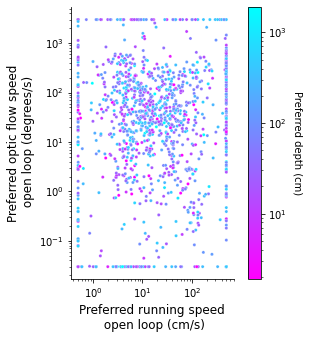

In [39]:
# --- FIG 5: Preferred RS open & OF open - closed preferred depth together--- 
fontsize_dict = {
    'title': 10,
    'xlabel': 12,
    'ylabel': 12,
    'xticks': 10,
    'yticks': 10,
    'legend': 10
}
sns.color_palette("tab10")
df = pd.DataFrame(columns=['preferred_running_speed_open_loop','preferred_of_speed_open_loop','preferred_depth_gaussian'])
df["preferred_running_speed_open_loop"] = np.exp(open_df["xo_logged"].to_numpy().astype(float))
df["preferred_of_speed_open_loop"] = np.exp(open_df["yo_logged"].to_numpy().astype(float))
df["preferred_depth_gaussian"] = close_df["preferred_depth_gaussian"].astype(float)
plt.figure(figsize=(5,5))
ax = sns.scatterplot(
    df, 
    x="preferred_running_speed_open_loop", 
    y="preferred_of_speed_open_loop", 
    hue=np.log(df["preferred_depth_gaussian"]),
    palette="cool_r",
    s=10)
sns.despine()
plt.gca().set_aspect("equal", "box")
plt.xscale("log")
plt.yscale("log")
plt.gca().get_legend().remove()
plt.xlabel('Preferred running speed\n open loop (cm/s)',fontsize=fontsize_dict['xlabel'])
plt.ylabel('Preferred optic flow speed\n open loop (degrees/s)',fontsize=fontsize_dict['ylabel'])
norm = mpl.colors.LogNorm(np.nanmin(df["preferred_depth_gaussian"]), np.nanmax(df["preferred_depth_gaussian"]))
sm = plt.cm.ScalarMappable(cmap="cool_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm)
cbar.ax.set_ylabel('Preferred depth (cm)', rotation=270, fontsize=fontsize_dict['legend'])
cbar.ax.tick_params(labelsize=fontsize_dict['legend'])
cbar.ax.get_yaxis().labelpad = 15
yticks = cbar.ax.get_yticks()
# cbar.ax.set_yticklabels(np.arange(len(yticks)), np.geomspace(np.nanmin(df["preferred_depth_gaussian"]), np.nanmax(df["preferred_depth_gaussian"]), len(yticks)))

plt.xticks(fontsize=fontsize_dict['xticks'])
plt.yticks(fontsize=fontsize_dict['yticks'])
plt.savefig(save_root+'rs_of_depth_scatter_together.pdf')